#### Classification

##### What is Classification
- Previously the methods we learned were used for modelling and prediction of a **quantitative** response variable. These are known as _regression_ problems.
- When the response variable is **categorical**, then the problem is labelled as a _classification_ problem. 
- Given a dataset $\{(x_{1}, y_{1}),...(x_{n}, y_{n})\}$, where the $y$'s are categorical variables, the goal is to predict which category $y$ takes on for a given $x$, based on a set of predictor variables.

##### Why is Classification Important
- Spam detection in email services can be viewed as a classification problem.
  - There are two classes to the response variable (spam or non-spam) so this is a _binary_ classification.
  - A classifier utilizes some training data to understand how given input variables relate to the class.
  - In this case, samples of known spam and non-spam email must be used as training data.
  - When the classifier is trained accurately, it can be used to detect the type of an unknown email. 
  
##### Complications with Linear Regression in Classification
- Linear regression is usually **inappropriate** for classification problems. Consider the case where the response variable is encoded quantitatively e.g. 
$Y = \left\{
\begin{array}{ll}
      0 & \textrm{if class 1,} \\
      1 & \textrm{if class 2,} \\
      2 & \textrm{if class 3,} \\
      \textrm{...} \\
\end{array} 
\right.$
- A linear regression model would imply a specific ordering of the outcomes and treat every unit change of $Y$ equivalently, but in this case, every unit change of $Y$ should not be interpreted equivalently i.e. a change from class 1 ($Y = 0$) to class 2 ($Y = 1$) is not the same as a change from class 2 ($Y = 1$) to class 3 ($Y = 2$). The difference in $Y$ values are the same but in reality they mean different outcomes.
- Similarly, the response variables can be reordered such that $Y = 0$ represents class 2 and $Y = 1$ represents class 1. Then the model estimates and predictions are fundamentally different.
- In the case of binary classification, regression may be used to predict $Y$ from predicted probability values, $\hat{y}$, e.g. for $\hat{y}\geq 0.5$, then $Y = 1$ and $Y = 0$ otherwise. This is known as **logistic regression**, where the $Y$ values are restricted to be in the range of [0,1].

<img src="https://miro.medium.com/max/3480/0*j4b6G61h6FGvaS16.jpg" width="400" height="300"/>

##### Logistic Regression
- The logistic regression model predicts $P(Y=1)$ for a binary response variable, $Y$, i.e. $Y = 0$ or $Y = 1$.
- It uses the logistic (logit) function to model $P(Y=1) = \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}$, where $\beta_{0} + \beta_{1}X$ represents the linear regression model using a single predictor. Note that we can use multiple predictors in the model too.
- Unlike the linear regression model, there is no error term $\epsilon$ since logistic regression does not model each individual value of $Y$ (no residuals).

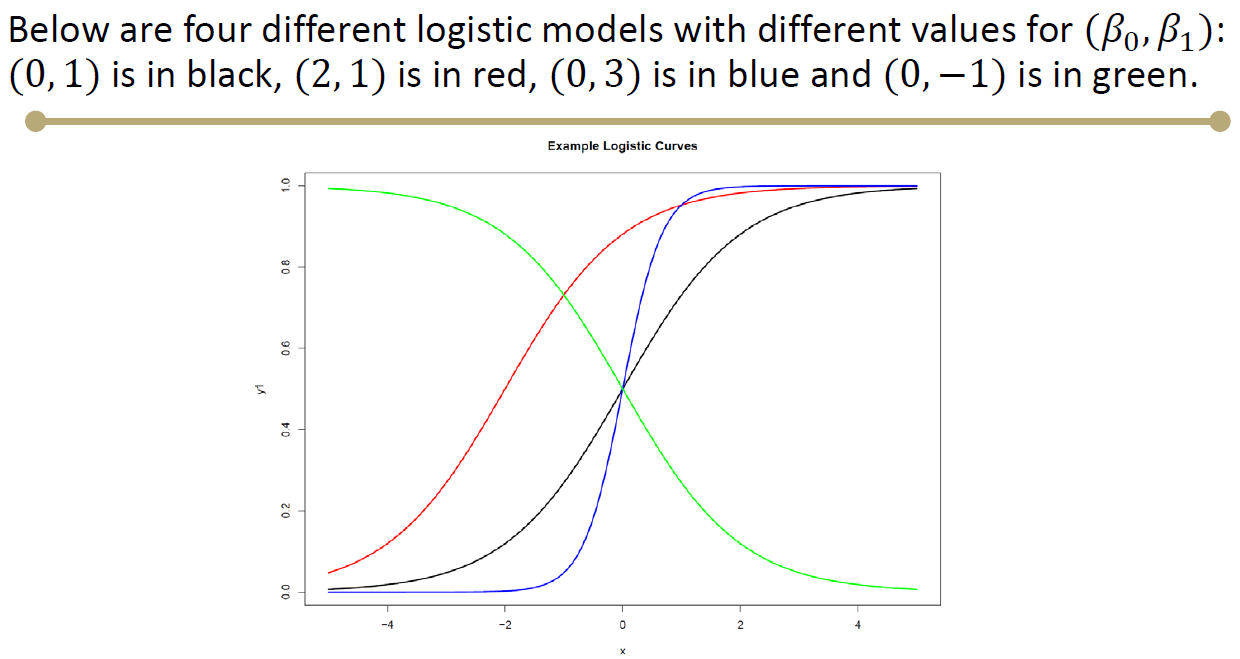

- With some algebraic manipulation, the logistic model can be rewritten as $\ln\frac{P(Y=1)}{1-P(Y=1)} = \beta_{0} + \beta_{1}X$
- Here, $\frac{P(Y=1)}{1-P(Y=1)}$ called the _odds_.
- Thus, the logit function transforms the Y-axis from a probability scale to a $\log$(odds) scale, so the logistic regression is said to model the **log-odds** as a linear function of the predictors. 

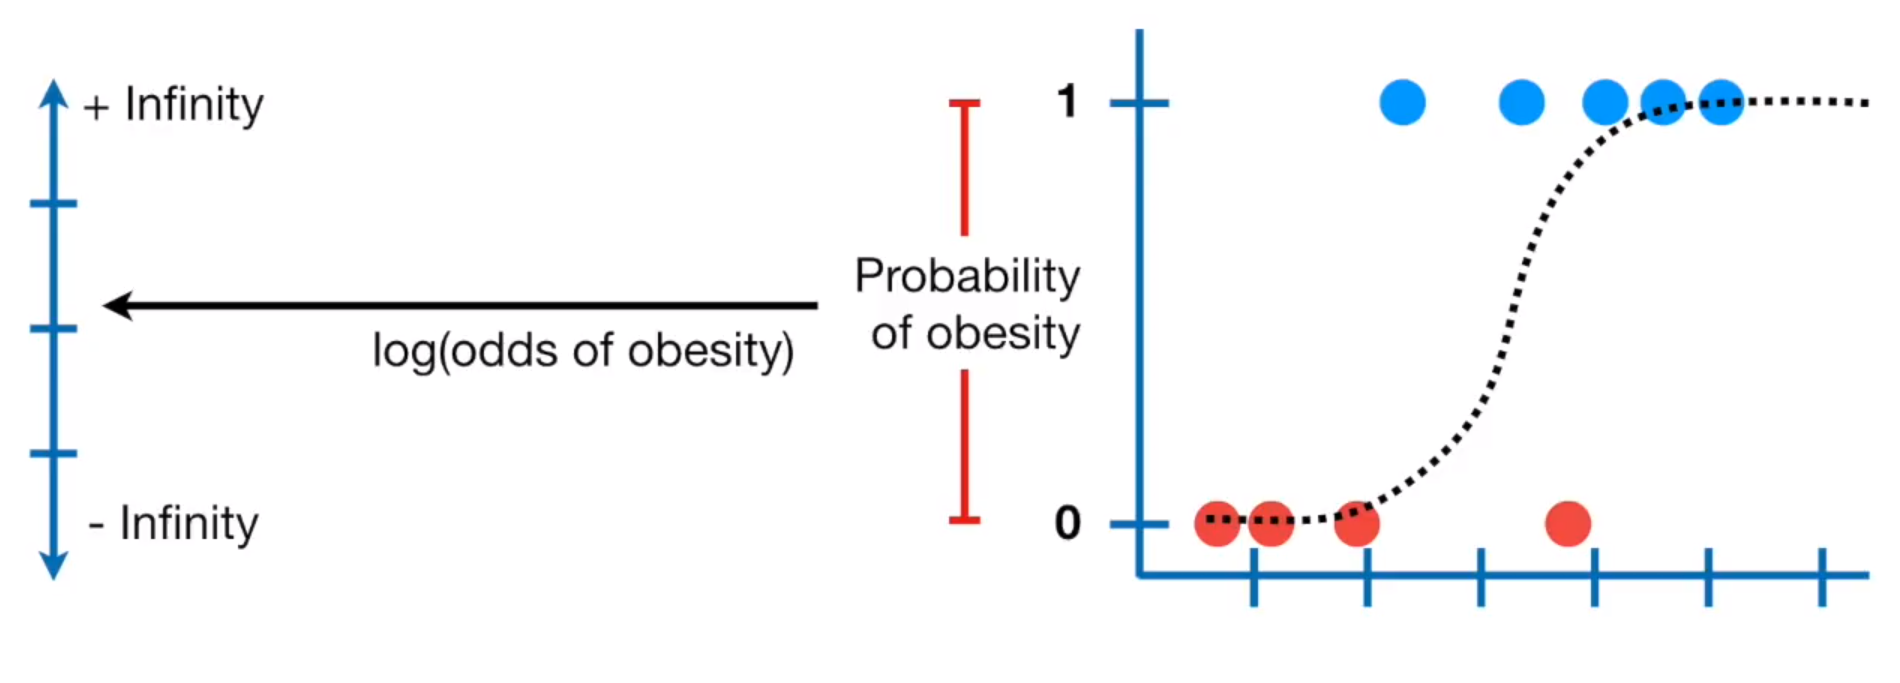
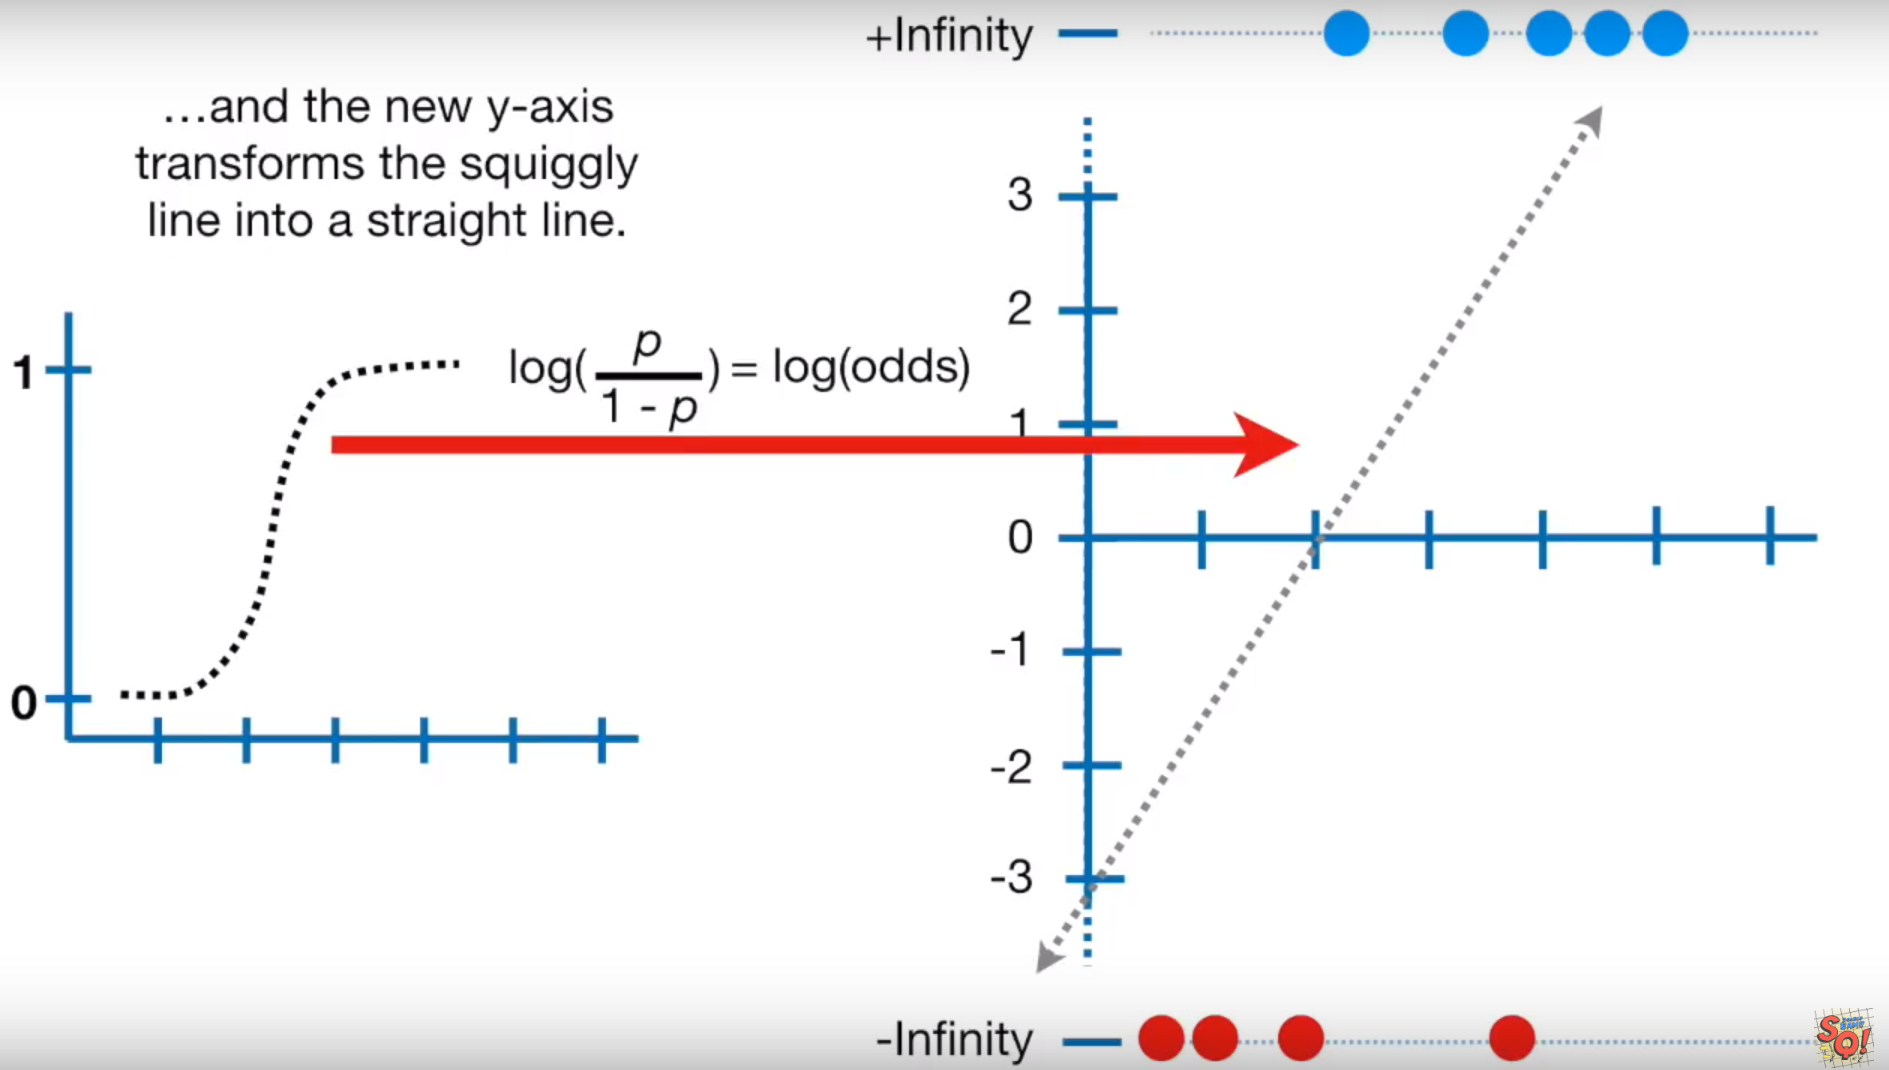

- Unlike linear regression model, we cannot find explicit formulae for the parameters $\beta_{0}$ and $\beta_{1}$. Parameters are estimated using **Maximum Likelihood Estimation** (https://www.youtube.com/watch?v=BfKanl1aSG0).


#### Implementation of Logistic Regression in R

In [ ]:
# Template code
# Step 1: Build Logit model on training dataset to predict Y using predictors X_1 and X_2
logitMod <- glm(Y ~ X_1 + X_2, family="binomial", data=trainingData)
# Step 2: Predict Y on test dataset, type argument "response" predicts probability rather than log odds of P
predictedY <- predict(logitMod, testData, type="response")

In [13]:
# Example from lecture
library(dplyr)
data(BreastCancer, package="mlbench")
bc <- BreastCancer[complete.cases(BreastCancer),] # creates copy of dataset and removes missing values
head(bc)
str(bc)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1000025,5,1,1,1,2,1,3,1,1,benign
1002945,5,4,4,5,7,10,3,2,1,benign
1015425,3,1,1,1,2,2,3,1,1,benign
1016277,6,8,8,1,3,4,3,7,1,benign
1017023,4,1,1,3,2,1,3,1,1,benign
1017122,8,10,10,8,7,10,9,7,1,malignant


'data.frame':	683 obs. of  11 variables:
 $ Id             : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


In [3]:
# Visualizing the data
# Suppose we wish to visualize the logistic fit based on one predictor, Cell.size
x <- as.numeric(bc$Cell.size) # converts factor variable to a numeric one
y <- ifelse(bc$Class=="malignant", 1,0) # convert to binary values 0, 1
plot(x, y, xlab = "Cell.size", ylab = "Class ", pch = 19)
logReg <- glm(y ~ x, family="binomial"); logReg


Call:  glm(formula = y ~ x, family = "binomial")

Coefficients:
(Intercept)            x  
     -5.174        1.598  

Degrees of Freedom: 682 Total (i.e. Null);  681 Residual
Null Deviance:	    884.4 
Residual Deviance: 254.8 	AIC: 258.8

- From the above output the logistic regression model is given by $\log(\textrm{odds}) = -5.174 + 1.598X$
- $\beta_{1} = 1.598$ means that for every one unit change in cell size, the log(odds) of the cell being malignant (versus benign) increases by 1.598.  
- We could classify all observations with predicted probability greater than 0.5 to be in the group with $Y = 1$ and $Y = 0$ otherwise.
- Such an approach is called the standard **Bayes classifier**, which assigns each observation to the most likely class given its predictor values. 

In [14]:
# Making predictions on training data
predictedY <- predict(logReg, bc, type="response")
summary(predictedY)
tapply(predictedY, bc$Class, mean)  # Mean of predicted probabilities for each class

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02721 0.02721 0.02721 0.34993 0.94352 0.99998 

benign  malignant 
0.07808743 0.85493381

In [15]:
# Lab 7 Notes
# Consider same dataset above with 3 predictors (Cl.thickness, Cell.size and Cell.shape) in the logistic model
str(bc)  # Inspect the dataset, note that the 3 predictors are categorical variables taking 10 possible values (levels)
# Convert 3 variables of cell features to numerical ones 
bc[,2:4] <- sapply(bc[,2:4], as.numeric)
# Convert outcome variable Class into binary(0,1) variable 
bc <- bc %>% mutate(y=factor(ifelse(bc$Class=="malignant", 1,0))) %>% select(Cl.thickness:Cell.shape, y); bc

'data.frame':	683 obs. of  11 variables:
 $ Id             : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


Cl.thickness,Cell.size,Cell.shape,y
<dbl>,<dbl>,<dbl>,<fct>
5,1,1,0
5,4,4,0
3,1,1,0
6,8,8,0
4,1,1,0
8,10,10,1
1,1,1,0
2,1,2,0
2,1,1,0


In [6]:
# Split data into training and test sets (80/20 rule)
set.seed(100)  # Don't forget to set seed to ensure reproduceability
trg_idx <- sample(nrow(bc), nrow(bc)*0.8) 
trg_data <- bc[trg_idx, ]; head(trg_data)
test_data <- bc[-trg_idx, ]; head(test_data)

# Construct logistic regression model using glm() on training set
logitMod <- glm(y~Cl.thickness+Cell.size+Cell.shape, family="binomial", data=trg_data)
summary(logitMod)

,Cl.thickness,Cell.size,Cell.shape,y
,<dbl>,<dbl>,<dbl>,<fct>
211,1,1,1,0
176,1,1,1,0
377,1,1,1,0
39,2,5,3,1
319,5,2,2,0
328,1,1,1,0


,Cl.thickness,Cell.size,Cell.shape,y
,<dbl>,<dbl>,<dbl>,<fct>
2,5,4,4,0
3,3,1,1,0
6,8,10,10,1
8,2,1,2,0
13,5,3,3,1
19,10,7,7,1



Call:
glm(formula = y ~ Cl.thickness + Cell.size + Cell.shape, family = "binomial", 
    data = trg_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7426  -0.1776  -0.0753   0.0266   2.2089  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -7.8675     0.8023  -9.806  < 2e-16 ***
Cl.thickness   0.5745     0.1122   5.119 3.07e-07 ***
Cell.size      0.6608     0.1924   3.434 0.000595 ***
Cell.shape     0.7671     0.1867   4.109 3.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 708.12  on 545  degrees of freedom
Residual deviance: 138.42  on 542  degrees of freedom
AIC: 146.42

Number of Fisher Scoring iterations: 7


##### Interpretation of the fitted logistic regression 
- For every one unit change in Cl.thickness, the $\ln$(odds) of being malignant (versus benign) increases by 0.5745, that is, the odds of being malignant increases by $𝑒^{0.5745}$ times. Similarly, with one unit increase in Cell.size (or Cell.shape), the odds of being malignant increases by $𝑒^{0.6608}$ ($𝑒^{0.7671}$) times.

In [8]:
# Prediction on test data
predicted_Y <- predict(logitMod, test_data, type="response") # Outputs are P(Y=1)
y_pred_prob <- ifelse(predicted_Y > 0.5, 1, 0) # 0.5 is the threshold value
y_pred <- factor(y_pred_prob, levels=c(0, 1))  # Convert vector of P(Y=1) to factor(categorical) variables

# Accuracy of the classification
mean(y_pred==test_data$y)  # Calculates average number of matches between predicted Y and actual Y

# Create a confusion matrix with row=y_pred, col=y 
tab <- table(y_pred,test_data$y); tab
# The two diagonal entries 88 and 41 are the numbers of true negative and true positive cases, there are 2 cases
# of false positives (predicted class=1, actual=0) and 6 cases of false negatives (predicted class=0, actual=1)

[1] 0.9416058

      
y_pred  0  1
     0 88  6
     1  2 41

- In terms of misclassification rates, **false positive rate = no. of false positive/total no. of actual negative = 2/88**, **false negative rate = no. of false negative/total no. of actual positive = 6/41**

#### kNN prediction model for classification problems

- Similar to the kNN model used in regression problems, kNN predicts a response from a set of observed predictor values, using the responses of other observations most similar or nearest to it.
- For a specified value of k, each observation’s outcome is predicted to be the average of the k-closest observations as measured by some distance of the predictor(s).
- The kNN approach to classification is similar, assigning a category that shows up the most among the k-nearest neighbours.
- Some issues that may arise are handling of ties (when 2 or more categories are equally likely, an odd value of k prevents this when the classification is binary), classifying to the most common group amongst the neighbours (all predictions may end up similar).
- For multiple predictors, we compute the euclidean distance as measure of distance between the observations of predictors. Always remember to normalize the predictor observations when using euclidean distance.